# Final Project

### Instructor - Dr. Uma Gajendragadkar
### Sharon Lynch Grey - June 17, 2025

---

### Problem - Design and develop a Machine learning model to predict whether a movie will be a success or failure using the Naive Bayes Algorithm. A successful movie is one where the gross exceeds the budget.

### Dataset - Movies dataset

The Movies Dataset is a popular collection of movie-related data that is derived from various sources, including IMDb (Internet Movie Database). It contains a wide range of information about movies, such as details about the cast, crew, plot summaries, ratings, genres, release dates, and more.

The dataset is made up of 3971 rows and 15 columns. Each row represents a movie and each column contains features of that movie including release date, genre, budget, and gross. **Target variable will be a SUCCESS column derived from budget and gross: 1 indicates the movie is a success, 0 indicates a failure.**

* name - Name of film
* rating - Motion Picture Association (MPA) ratings: G, PG, PG-13, R, NC-17
* genre - Genre of film (e.g., Action, Comedy, Drama)
* year - Year of release
* released - Full date of release
* score - Rating on IMDB (scale 0.0 - 10.0)
* votes - Number of user ratings on IMDB
* director - Film's director
* writer - Primary writer
* star - Primary Actor
* country - Country of origin
* budget - Cost to make the film
* gross - Gross earnings in U.S. dollars
* company - Distributor
* runtime - Length of film in minutes
* success - derived column: if (gross - budget > 0) then 1 (success), else 0 (failure)

## Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc 

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [47]:
# read data from dataset into pandas dataframe
movies = pd.read_csv('movies_updated.csv')

### Display info about dataset

In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


### Display first 5 rows of dataset

In [49]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"


### Display summary statistics

In [50]:
movies.describe()

,year,score,votes,budget,gross
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,3.831000e+03
mean,1991.191500,6.321950,5.449450e+04,1.542740e+07,4.172202e+07
std,5.934529,0.977101,1.427738e+05,2.248639e+07,9.259504e+07
min,1980.000000,2.200000,5.100000e+01,0.000000e+00,3.090000e+02
25%,1986.000000,5.700000,4.300000e+03,0.000000e+00,2.835743e+06
50%,1991.000000,6.400000,1.300000e+04,7.000000e+06,1.183822e+07
75%,1996.000000,7.000000,4.500000e+04,2.100000e+07,3.560495e+07
max,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09


### Check for missing values

In [51]:
null_counts = movies.isnull().sum()
null_counts

name           0
rating        40
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         1
star           1
country        0
budget         0
gross        169
company       10
runtime,,      0
dtype: int64

In [52]:
# check for zeros in budget colummn
zero_counts = (movies['budget'] == 0).sum()
zero_counts

1392

### Create Target 'Success' column

In [53]:
# if gross minus budget is greater than 0, value is 1 (success); else 0
movies['success'] = (movies['gross'] - movies['budget'] > 0).astype(int)

In [54]:
# confirm column and values has been added
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,",success
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,",1
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,",1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,",1
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,",1
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,",1


### Plot Success with other Features

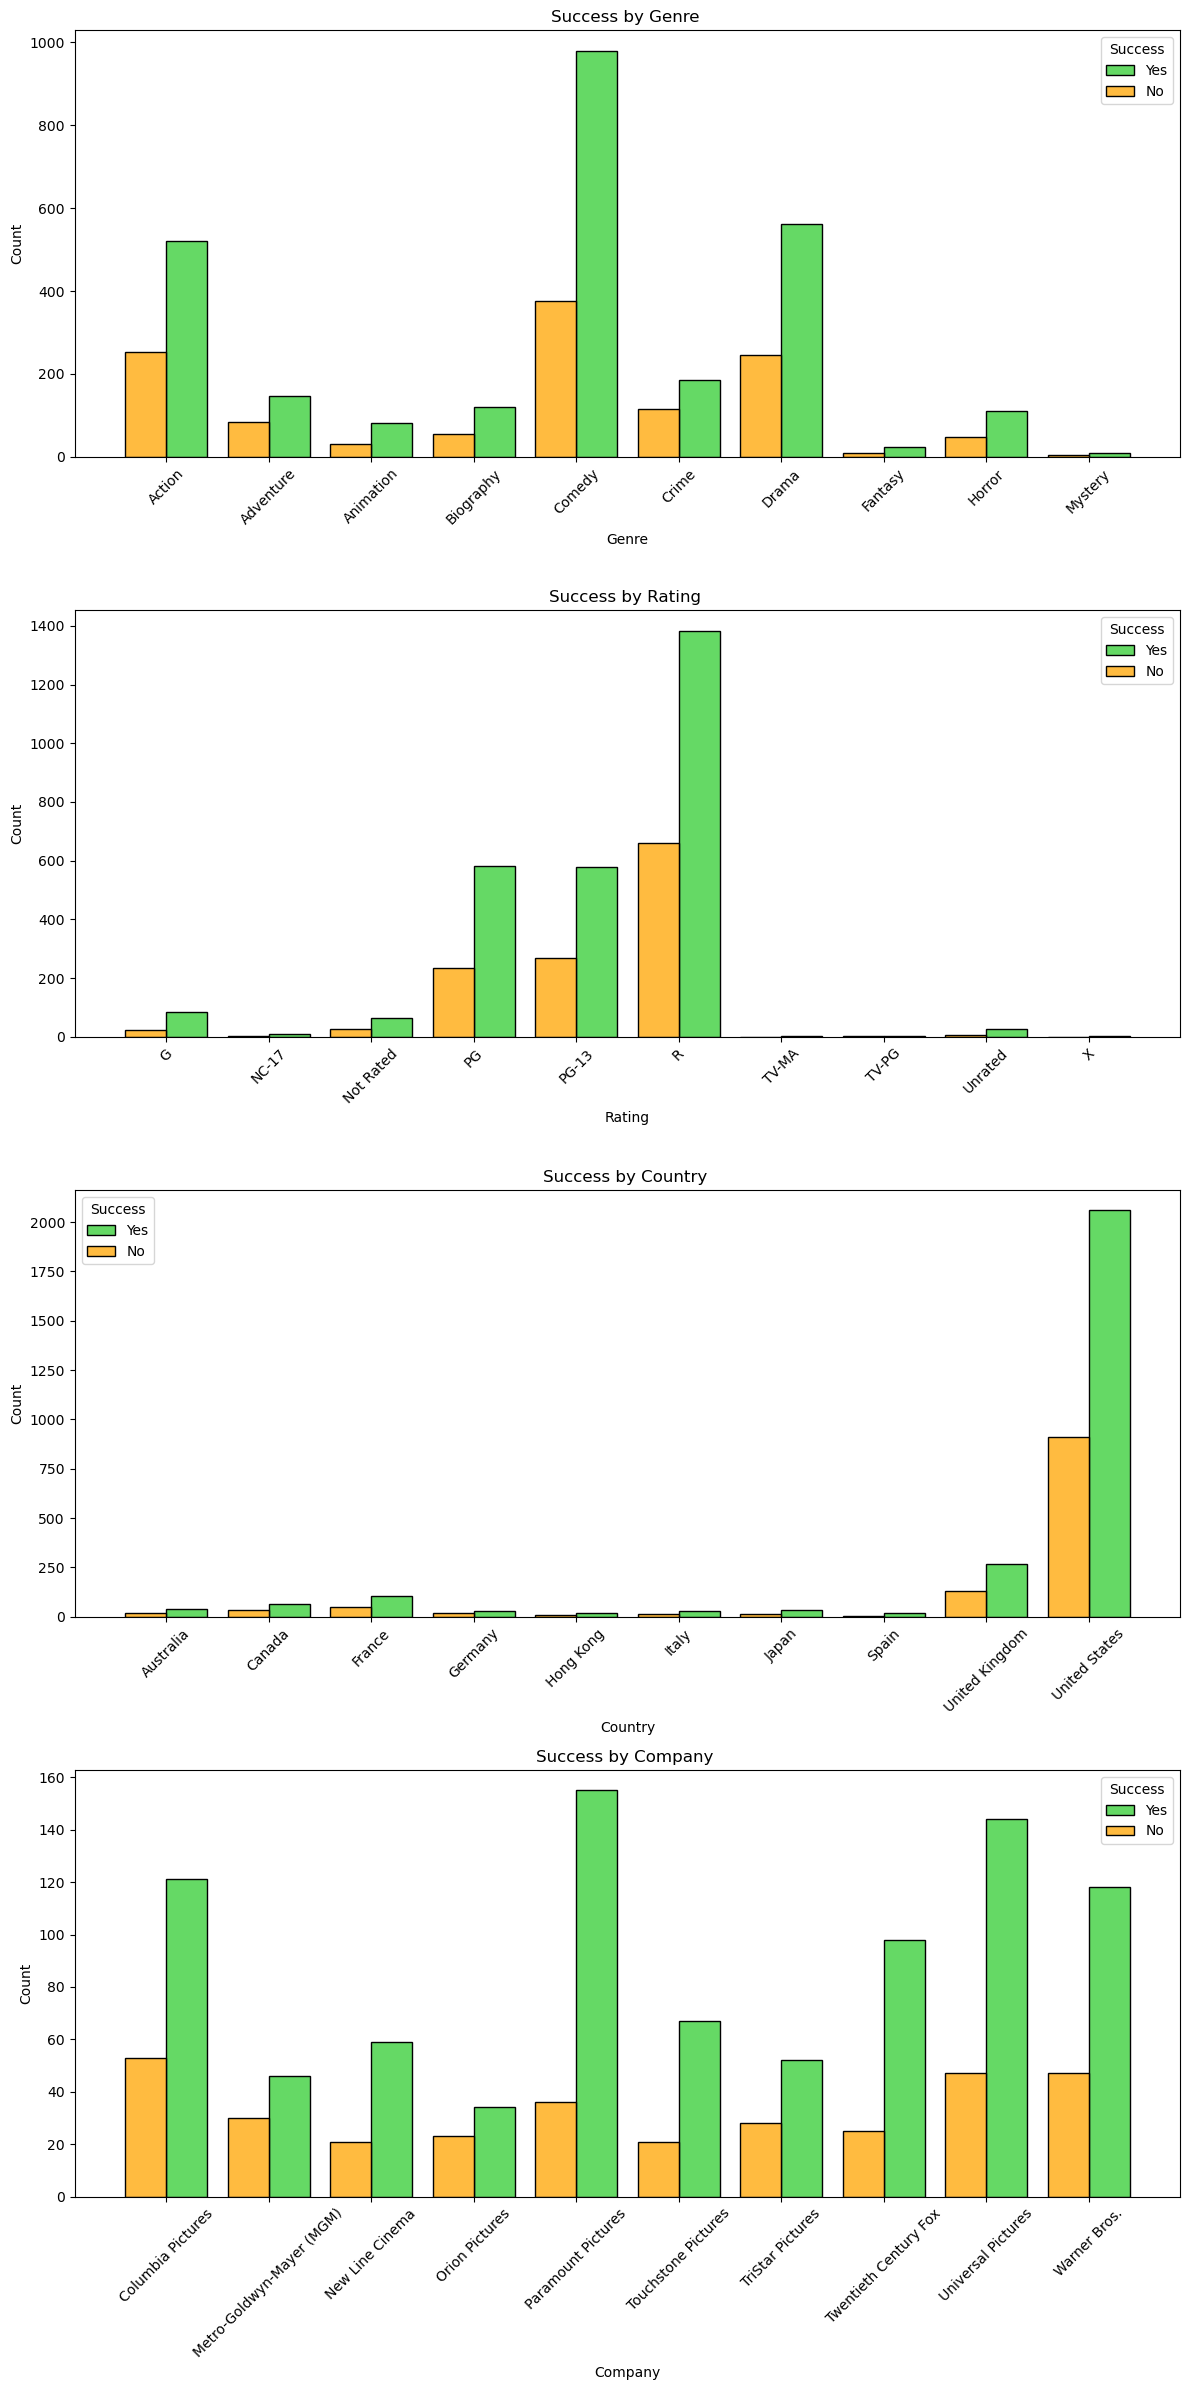

In [55]:
columns_to_plot = ['genre', 'rating', 'country', 'company']
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 6*len(columns_to_plot)))

for i, col in enumerate(columns_to_plot):
    # Get top 10 values for the column regardless of success and sort alphabetically
    top_values = movies[col].value_counts().nlargest(10).index.sort_values()

    # filter data to include only top 10 values
    filtered = movies[movies[col].isin(top_values)]

    filtered[col] = pd.Categorical(filtered[col], categories=sorted(top_values), ordered=True)
    
    # create histplot showing distribution by success
    sns.histplot(data=filtered, x=col, hue='success', multiple='dodge', palette={0: 'orange', 1: 'limegreen'},
                 discrete=True, shrink=0.8, ax=axes[i])

    axes[i].set_title(f"Success by {col.title()} ")
    axes[i].set_xlabel(col.title())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Success', labels=['Yes', 'No'])
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

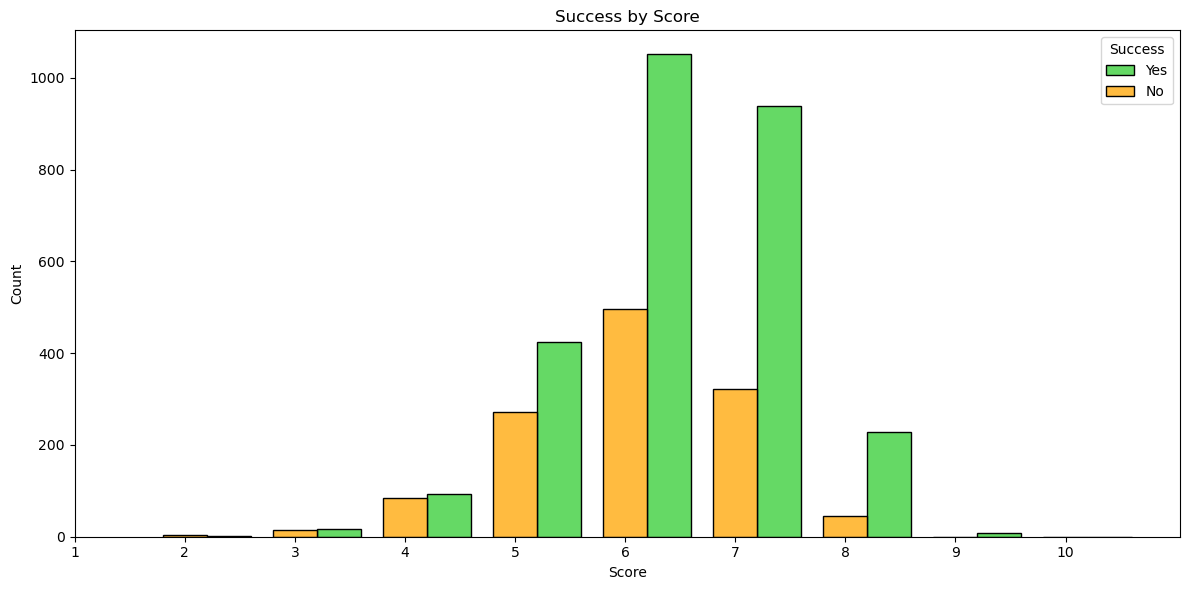

In [56]:
# plot Success by Score (Rating on IMDB)
fig, ax = plt.subplots(figsize=(12, 6))

all_values = movies['score'].value_counts().index.sort_values()

# filter data to include only top 10 values
filtered = movies[movies['score'].isin(all_values)]

filtered['score'] = pd.Categorical(filtered['score'], categories=sorted(all_values), ordered=True)
    
# create histplot showing distribution by success
sns.histplot(data=filtered, x='score', hue='success', multiple='dodge', palette={0: 'orange', 1: 'limegreen'}, 
             discrete=True, shrink=0.8, ax=ax)

ax.set_title(f'Success by Score')
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.legend(title='Success', labels=['Yes', 'No'])

ax.set_xticks(range(1, 11))

plt.tight_layout()
plt.show()

## Data Preprocessing

### Clean Data

In [57]:
# rename runtime column to remove trailing commas
movies = movies.rename(columns={'runtime,,': 'runtime'})

In [58]:
# remove trailing comma from values in runtime
movies['runtime'] = movies['runtime'].str.rstrip(',')

In [59]:
# convert runtime column to int converting any NaN to 0
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

In [60]:
# drop released column as year is sufficient
movies = movies.drop(columns=['released'], axis=1)

In [61]:
# drop rows where gross is NaN
movies.dropna(subset=['budget', 'gross'], inplace = True)
# update dataframe without rows where budget is 0
movies = movies[(movies['budget'] != 0)]

In [62]:
# confirm removal of zeros
movies.describe()

,year,score,votes,budget,gross,runtime,success
count,2559.000000,2559.000000,2.559000e+03,2.559000e+03,2.559000e+03,2559.000000,2559.000000
mean,1992.138335,6.357718,7.754436e+04,2.402046e+07,5.763914e+07,107.447831,0.582259
std,5.933269,0.970565,1.707371e+05,2.415320e+07,1.092439e+08,18.661722,0.493283
min,1980.000000,2.200000,2.080000e+02,6.000000e+03,3.090000e+02,69.000000,0.000000
25%,1987.000000,5.800000,8.600000e+03,8.000000e+06,6.155548e+06,95.000000,0.000000
50%,1993.000000,6.400000,2.500000e+04,1.600000e+07,1.941299e+07,104.000000,1.000000
75%,1997.000000,7.000000,7.300000e+04,3.000000e+07,5.637982e+07,116.000000,1.000000
max,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09,271.000000,1.000000


In [63]:
# get counts of newly added values in success
movies['success'].value_counts()

success
1    1490
0    1069
Name: count, dtype: int64

In [64]:
# double check that dataframe looks as expected
movies.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,success
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1


### Normalize and Encode Features

In [65]:
# encode categorical columns using one hot encoding
movies = pd.get_dummies(movies, columns=['rating', 'genre', 'director', 'writer', 'star', 'country', 'company'],
                       prefix=['rating', 'genre', 'director', 'writer', 'star', 'country', 'company'])

In [66]:
# normalize numerical features with StandardScaler
numerical_features = ['year', 'score', 'votes', 'budget', 'runtime']
scaler = StandardScaler()

# fit and transform
movies[numerical_features] = scaler.fit_transform(movies[numerical_features])

In [67]:
movies.head()

,name,year,score,votes,budget,gross,runtime,success,rating_Approved,rating_G,...,company_World Film Services,company_Young Sung Production Co.,company_Zacharias-Buhai Productions,company_Zanuck/Brown Productions,company_Zenith Entertainment,company_Zentropa Entertainments,company_Zeta Entertainment,company_Zoetrope Studios,company_Zucker Brothers Productions,company_double A Films
0,The Shining,-2.046209,2.104632,4.976198,-0.207900,46998772.0,2.066246,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,The Blue Lagoon,-2.046209,-0.574745,-0.073486,-0.808351,58853106.0,-0.184790,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Star Wars: Episode V - The Empire Strikes Back,-2.046209,2.413791,6.575460,-0.249310,538375067.0,0.887132,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Airplane!,-2.046209,1.383261,0.840378,-0.849762,83453539.0,-1.042328,1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Caddyshack,-2.046209,0.971049,0.178412,-0.746236,39846344.0,-0.506367,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# replace all false values with 0 and true with 1
movies.replace({True: 1, False: 0}, inplace=True)

In [69]:
movies.head()

,name,year,score,votes,budget,gross,runtime,success,rating_Approved,rating_G,...,company_World Film Services,company_Young Sung Production Co.,company_Zacharias-Buhai Productions,company_Zanuck/Brown Productions,company_Zenith Entertainment,company_Zentropa Entertainments,company_Zeta Entertainment,company_Zoetrope Studios,company_Zucker Brothers Productions,company_double A Films
0,The Shining,-2.046209,2.104632,4.976198,-0.207900,46998772.0,2.066246,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Blue Lagoon,-2.046209,-0.574745,-0.073486,-0.808351,58853106.0,-0.184790,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,-2.046209,2.413791,6.575460,-0.249310,538375067.0,0.887132,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airplane!,-2.046209,1.383261,0.840378,-0.849762,83453539.0,-1.042328,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Caddyshack,-2.046209,0.971049,0.178412,-0.746236,39846344.0,-0.506367,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

### Independent/Dependent variables

In [70]:
# Split data into independent/dependent variables
# Do not include name as irrelevant
# Do not include gross as not to make it easy for model to pick success
X = movies.drop(columns=['name', 'gross', 'success'])
y = movies['success'] 

### Split data into training and testing sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

## Train Model

## Initialize model using Naive Bayes

In [72]:
model = GaussianNB()

#### Fit model

In [73]:
# train model on dataset
model.fit(X_train, y_train)

GaussianNB()

### Make predictions

In [74]:
# store predicted target variables from test data in y_pred
y_pred = model.predict(X_test)

## Evaluate Performance

### Find accuracy of model

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.53


In [76]:
# find precision, recall, and F1 score for model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.45      0.65      0.53       210
           1       0.64      0.44      0.52       302

    accuracy                           0.53       512
   macro avg       0.55      0.54      0.53       512
weighted avg       0.56      0.53      0.52       512



### Confusion Matrix

In [77]:
# evaluate using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[137,  73],
       [170, 132]], dtype=int64)

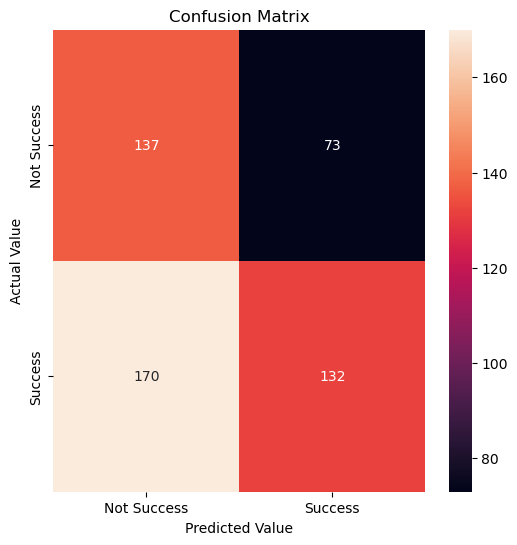

In [78]:
# heatmap for confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g',
            xticklabels=['Not Success', 'Success'],
            yticklabels=['Not Success', 'Success'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

plt.show()

## Train Model 2

### Initialize model using Naive Bayes and Random Under Sampler

In [79]:
# initialize Random Under Sampler
rus = RandomUnderSampler()

In [80]:
# fit and resample
X_resampled, y_resampled = rus.fit_resample(X, y)

In [81]:
### Split data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1) 

In [82]:
model_resampled = GaussianNB()

In [83]:
# get counts of success and not success
y_resampled.value_counts()

success
0    1069
1    1069
Name: count, dtype: int64

#### Fit model

In [84]:
# train model on dataset
model_resampled.fit(X_resampled_train, y_resampled_train)

GaussianNB()

### Make predictions

In [85]:
# store predicted target variables from test data in y_pred
y_resampled_pred = model_resampled.predict(X_resampled_test)

## Evaluate Performance

### Find accuracy of model

In [86]:
accuracy = accuracy_score(y_resampled_test, y_resampled_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.54


In [87]:
# find precision, recall, and F1 score for model
report = classification_report(y_resampled_test, y_resampled_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.36      0.43       214
           1       0.53      0.72      0.61       214

    accuracy                           0.54       428
   macro avg       0.54      0.54      0.52       428
weighted avg       0.54      0.54      0.52       428



### Confusion Matrix

In [88]:
# evaluate using confusion matrix
cm_resampled = confusion_matrix(y_resampled_test, y_resampled_pred)
cm_resampled

array([[ 76, 138],
       [ 60, 154]], dtype=int64)

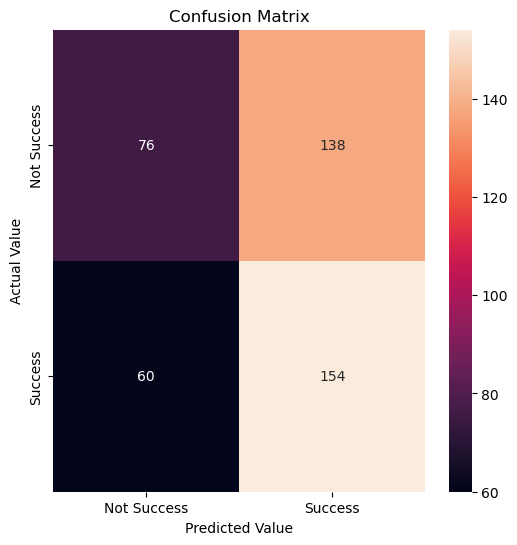

In [89]:
# heatmap for confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_resampled, annot=True, fmt='g',
            xticklabels=['Not Success', 'Success'],
            yticklabels=['Not Success', 'Success'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

plt.show()

## Create ROC Curves for both models

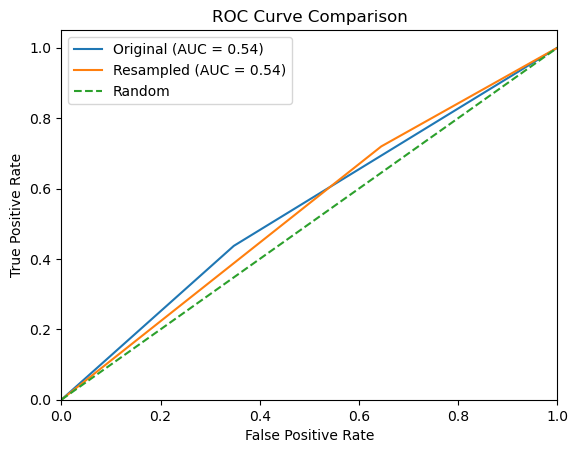

In [90]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr_resampled, tpr_resampled, thresholds = roc_curve(y_resampled_test, y_resampled_pred)

roc_auc = auc(fpr, tpr)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Original (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_resampled, tpr_resampled, label='Resampled (AUC = %0.2f)' % roc_auc_resampled)

plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim({0.0, 1.05})

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')

plt.legend()
plt.show()